In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc #맥 한글깨짐
rc('font', family='AppleGothic')#맥 한글깨짐


# 2018년 2021년 여행비율 파이차트

In [169]:
travel_2018_2021=pd.read_csv("/Users/yeseulseo/cp1/project/eda/관광여행_현황_20220907223332.csv",encoding='cp949')
travel_2018_2021 = travel_2018_2021.drop(['특성별(1)','특성별(2)','2018','2018.3','2018.5','2021'], axis=1)
travel_2018_2021

,2018.1,2018.2,2018.4,2021.1,2021.2,2021.3
0,국내_당일여행,국내_숙박여행,해외여행,국내_당일여행,국내_숙박여행,해외여행
1,횟수 (회),횟수 (회),횟수 (회),횟수 (회),횟수 (회),소계
2,3.6,1.3,0.4,4.3,2.1,0.0
3,3.8,1.4,0.4,4.6,2.3,0.0
4,2.8,1.0,0.4,3.1,1.3,0.0
5,5.4,2.4,0.5,4.4,3.2,0.0
6,4.7,1.9,0.6,6.2,2.1,0.0
7,4.1,1.4,0.6,4.4,1.8,0.0
8,2.8,1.0,0.4,3.2,1.4,0.0
9,2.3,0.6,0.2,3.4,1.0,0.0


In [170]:
travel_2018_2021.columns = ['2018_국내_당일여행', '2018_국내_숙박여행', '2018_해외여행', '2021_국내_당일여행','2021_국내_숙박여행', '2021_해외여행']
travel_2018_2021 = travel_2018_2021.loc[2:2]
travel_2018_2021.reset_index(drop=True, inplace=True)

In [171]:
travel_2018_2021

,2018_국내_당일여행,2018_국내_숙박여행,2018_해외여행,2021_국내_당일여행,2021_국내_숙박여행,2021_해외여행
0,3.6,1.3,0.4,4.3,2.1,0.0


In [172]:
travel_2018_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   2018_국내_당일여행  1 non-null      object
 1   2018_국내_숙박여행  1 non-null      object
 2   2018_해외여행     1 non-null      object
 3   2021_국내_당일여행  1 non-null      object
 4   2021_국내_숙박여행  1 non-null      object
 5   2021_해외여행     1 non-null      object
dtypes: object(6)
memory usage: 176.0+ bytes


In [173]:
travel_2018_2021 = travel_2018_2021.astype('float')
travel_2018_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   2018_국내_당일여행  1 non-null      float64
 1   2018_국내_숙박여행  1 non-null      float64
 2   2018_해외여행     1 non-null      float64
 3   2021_국내_당일여행  1 non-null      float64
 4   2021_국내_숙박여행  1 non-null      float64
 5   2021_해외여행     1 non-null      float64
dtypes: float64(6)
memory usage: 176.0 bytes


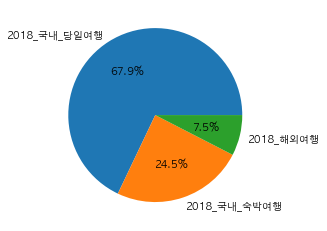

In [174]:
# 2018년
ratio1=[3.6, 1.3, 0.4]

column_list = list(travel_2018_2021.columns)
labels1 = column_list[0:3]

plt.pie(ratio1, labels=labels1, autopct='%.1f%%')
plt.show()

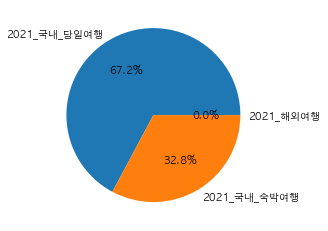

In [195]:
# 2021년
ratio2=[4.3, 2.1, 0.0]

column_list = list(travel_2018_2021.columns)
labels2 = column_list[3:]


plt.pie(ratio2, labels=labels2, autopct='%.1f%%')
plt.show()

## 코로나 전후 여행 횟수 막대그래프


In [176]:
# 막대그래프를 만들기위해 dataframe만들기
bar_travel={
    'travel' : ['국내당일여행','국내숙박여행','해외여행'],
    '2018' : ratio1,
    '2021' : ratio2

}
bar_travel = pd.DataFrame(bar_travel)
bar_travel

,travel,2018,2021
0,국내당일여행,3.6,4.3
1,국내숙박여행,1.3,2.1
2,해외여행,0.4,0.0


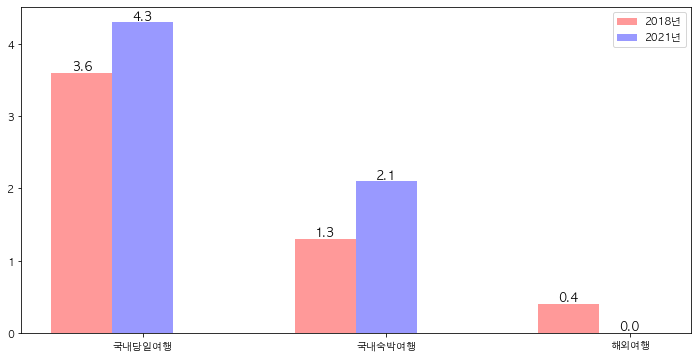

In [177]:
fig, ax = plt.subplots(figsize=(12,6))
bar_width = 0.25

index = np.arange(3)

#2018년 그래프 
b2018 = plt.bar(index, bar_travel['2018'], bar_width, alpha=0.4, color='red', label='2018년')

#그래위에 수 나타내기
for rect in b2018:
    height = rect.get_height()
    plt.text(rect.get_x()+rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size=12)

#2021 그래프
b2021 = plt.bar(index+bar_width, bar_travel['2021'], bar_width, alpha=0.4, color='blue', label='2021년')
for rect in b2021:
    height = rect.get_height()
    plt.text(rect.get_x()+rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size=12)
#x축 위치를 정 가운데로 조정하고,x축의 텍스트를 travel 정보와 매칭
plt.xticks(np.arange(bar_width, 3+bar_width, 1), bar_travel['travel'])

plt.legend()
plt.show()

# 상관관계 

In [180]:
df=pd.read_csv("/Users/yeseulseo/cp1/project/data/final_final_data.csv",index_col=0)

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19384 entries, 0 to 19383
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          19384 non-null  int64  
 1   title       19384 non-null  object 
 2   addr        19384 non-null  object 
 3   addr_area   19384 non-null  object 
 4   addr_sigun  19384 non-null  object 
 5   cat_large   19384 non-null  object 
 6   cat_middle  19384 non-null  object 
 7   cat_sub     19384 non-null  object 
 8   cat1        19384 non-null  object 
 9   cat2        19384 non-null  object 
 10  grade       19384 non-null  int64  
 11  review_num  19330 non-null  object 
 12  ratings     19271 non-null  float64
dtypes: float64(1), int64(2), object(10)
memory usage: 2.1+ MB


In [182]:
df.isna().sum()

id              0
title           0
addr            0
addr_area       0
addr_sigun      0
cat_large       0
cat_middle      0
cat_sub         0
cat1            0
cat2            0
grade           0
review_num     54
ratings       113
dtype: int64

In [183]:
df = df.dropna(axis=0)

In [184]:
# 공분산
np.corrcoef(df['grade'], df['ratings'])[0,1]

# 공분산이 0에 가까우므로 조회수 등급과 별점은 관련이 없다는 것을 알 수 있다.
# 즉, 조회수가 높다고 별점이 높은 것은 아니라는 것을 알 수 있다. 

0.0351702982497446

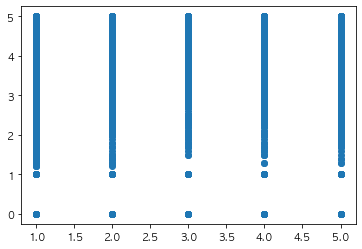

In [185]:
plt.scatter(df['grade'], df['ratings'])
plt.show()

In [186]:
df['review_num'] = df['review_num'].str.replace(pat=r'[^\w]', repl=r'', regex=True)

In [187]:
df['review_num']= df['review_num'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19271 entries, 0 to 19383
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          19271 non-null  int64  
 1   title       19271 non-null  object 
 2   addr        19271 non-null  object 
 3   addr_area   19271 non-null  object 
 4   addr_sigun  19271 non-null  object 
 5   cat_large   19271 non-null  object 
 6   cat_middle  19271 non-null  object 
 7   cat_sub     19271 non-null  object 
 8   cat1        19271 non-null  object 
 9   cat2        19271 non-null  object 
 10  grade       19271 non-null  int64  
 11  review_num  19271 non-null  float64
 12  ratings     19271 non-null  float64
dtypes: float64(2), int64(2), object(9)
memory usage: 2.1+ MB


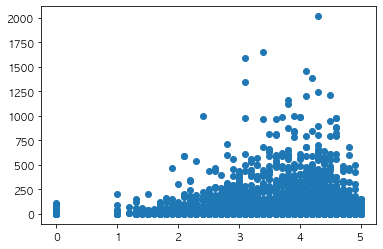

In [189]:
plt.scatter( df['ratings'],df['review_num'])
plt.show()

# cat_sub 분포

In [190]:
# grade, ratings에 따라 내림차순으로 정렬한 후 'cat_sub'을 분석
df2 = df.sort_values([ 'ratings','grade'], ascending=False)
cat_best=df2['cat_sub'][0:100].value_counts()[:10]
# cat_best
cat_best_ratio=list(cat_best.values)
cat_best_labels=list(cat_best.index)

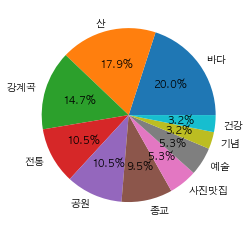

In [191]:
plt.pie(cat_best_ratio, labels=cat_best_labels, autopct='%.1f%%')
plt.show()

In [192]:
# grade, ratings에 따라 내림차순으로 정렬한 후 'cat_sub'을 분석
df3 = df.sort_values([ 'ratings','grade'], ascending=False)
addr_best=df3['addr_area'][0:100].value_counts()[:10]
addr_best
addr_best_ratio=list(addr_best.values)
addr_best_labels=list(addr_best.index)

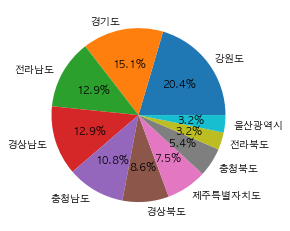

In [193]:
plt.pie(addr_best_ratio, labels=addr_best_labels, autopct='%.1f%%')
plt.show()